# 2 Data Wrangling<a id='2_Data_wrangling'></a>

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Load the Data](#2.4_Load_the_Data)
  * [2.5 Explore the Data](#2.5_Explore_the_Data)
  * [2.6 Look at missing values](#2.6_Look_at_missing_values)
      * [2.6.1 Columns with the most missing values](#2.6.1_Columns_with_the_most_missing_values)
  * [2.7 Data types](#2.7_Data_types)
  * [2.8 Initial column drops](#2.8_Initial_column_drops)
  * [2.9 Initial data cleaning](#2.9_Initial_data_cleaning)
  * [2.10 Data descriptions](#2.10_Data_descriptions)
  * [2.11 Missing Data Second Look](#2.11_Missing_Data_Second_Look)
      * [2.11.1 Filling Missing Data](#2.11.1_Filling_Missing_Data)
  * [2.12 Look at object columns](#2.12_Look_at_object_columns)
  * [2.13 Bar plots of the features](#2.13_Bar_plots_of_the_features)
  * [2.14 Save the data](#2.14_Save_the_data)
  * [2.15 Summary](#2.15_Summary)

## 2.2 Introduction<a id='2.2_Introduction'></a>
From Kaggle - Lending Club is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market.

Lending Club enables borrowers to create unsecured personal loans between $1,000 and $40,000. The standard loan period is three years. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. Lending Club makes money by charging borrowers and origination fee and investors a service fee.

In this notebook I will focus on collecting the data, organizing it, and making sure it's well defined. This is a large data set with 74 columns and over 800,000 rows. While cleaning the data, I will end up deleting some columns and rows but, overall, I would like to keep most of the columns until I decide which features will be useful for my model. 


## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2.4 Load the Data<a id='2.4_Load_the_Data'></a>

For information about each column - https://www.rdocumentation.org/packages/creditmodel/versions/1.0/topics/lendingclub

In [2]:
# read in csv data - training set
lending_data = pd.read_csv('../raw_data/lc_loan.csv')

C:\Users\McD\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# read in csv data - test set
lending_data_test = pd.read_csv('../raw_data/lc_2016_2017.csv')

C:\Users\McD\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,54) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 2.5 Explore the Data<a id='2.5_Explore_the_Data'></a>

In [4]:
# what does the Lending Club data look like?
lending_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [5]:
# what does the hold-out test set look like?
lending_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

It looks like there are two less columns in the test set than the training set. This will require a closer look. First, I want to look at which column could make a good index. 

In [6]:
# id: A unique LC assigned ID for the loan listing.
# member_id: A unique LC assigned Id for the borrower member.
# based on the column descriptions, it looks like 'id' or 'member_id' would be a good choice for the index
lending_data[['id', 'member_id']].nunique()

id           887379
member_id    887379
dtype: int64

In [7]:
lending_data_test[['id', 'member_id']].nunique()

id           759338
member_id         0
dtype: int64

The 'member_id' column in the test data is missing values. Therefore, it looks like the 'id' column would be the best choice for the index.

Next, I will take a closer look which columns are in the training data but not in test.

In [8]:
#taken from datascience.stackexchange.com to look at which columns are the same between the two dataframes
list(set(lending_data.columns).intersection(set(lending_data_test.columns)))

['int_rate',
 'application_type',
 'total_pymnt_inv',
 'title',
 'mths_since_rcnt_il',
 'term',
 'out_prncp',
 'total_rec_prncp',
 'total_pymnt',
 'sub_grade',
 'installment',
 'total_rec_int',
 'last_pymnt_amnt',
 'grade',
 'member_id',
 'inq_fi',
 'pymnt_plan',
 'open_il_12m',
 'earliest_cr_line',
 'collections_12_mths_ex_med',
 'dti_joint',
 'issue_d',
 'loan_status',
 'inq_last_12m',
 'tot_cur_bal',
 'emp_length',
 'last_pymnt_d',
 'policy_code',
 'open_il_24m',
 'all_util',
 'total_acc',
 'revol_util',
 'desc',
 'total_rec_late_fee',
 'max_bal_bc',
 'collection_recovery_fee',
 'last_credit_pull_d',
 'addr_state',
 'pub_rec',
 'verification_status',
 'open_acc',
 'mths_since_last_major_derog',
 'verification_status_joint',
 'dti',
 'annual_inc_joint',
 'zip_code',
 'next_pymnt_d',
 'acc_now_delinq',
 'loan_amnt',
 'delinq_2yrs',
 'funded_amnt_inv',
 'home_ownership',
 'inq_last_6mths',
 'open_rv_12m',
 'total_rev_hi_lim',
 'total_cu_tl',
 'recoveries',
 'total_bal_il',
 'emp_title'

In [9]:
# Looking at which columns are in lending_data but not lending_data_test
list(set(lending_data.columns).difference(set(lending_data_test.columns)))

['url', 'open_il_6m']

In [10]:
# Looking at which columns are in lending_data_test but not lending_data
list(set(lending_data_test.columns).difference(set(lending_data.columns)))

[]

It looks like all of the columns in the test set are in the training set but 'url' and 'open_il_6m' are in the training set and not in test. It would make sense to drop these two columns.

## 2.6 Look at missing values<a id='2.6_Look_at_missing_values'></a>

In [11]:
# Looking at missing values by columns
# copied from the guided capstone
missing_train = pd.concat([lending_data.isnull().sum(), 100 * lending_data.isnull().mean()], axis=1)
missing_train.columns=['count', '%']
missing_train.sort_values(by='%', ascending=False).head(40)

,count,%
dti_joint,886870,99.942640
annual_inc_joint,886868,99.942415
verification_status_joint,886868,99.942415
il_util,868762,97.902024
mths_since_rcnt_il,866569,97.654892
open_acc_6m,866007,97.591559
open_il_6m,866007,97.591559
open_il_12m,866007,97.591559
open_il_24m,866007,97.591559
total_bal_il,866007,97.591559


In [12]:
# Looking at missing values in test set by columns
missing_test = pd.concat([lending_data_test.isnull().sum(), 100 * lending_data_test.isnull().mean()], axis=1)
missing_test.columns=['count', '%']
missing_test.sort_values(by='%', ascending=False).head(15)

,count,%
member_id,759338,100.000000
desc,759321,99.997761
dti_joint,725337,95.522284
verification_status_joint,725335,95.522020
annual_inc_joint,725335,95.522020
mths_since_last_record,618159,81.407621
mths_since_last_major_derog,544233,71.672035
mths_since_last_delinq,362705,47.765949
next_pymnt_d,167915,22.113341
il_util,100595,13.247724


### 2.6.1 Columns with the most missing values:<a id='2.6.1_Columns_with_the_most_missing_values'></a>
- dti_joint: A ratio calculated using the co:borrowers' total monthly payments on the total debt obligations, excluding mortgages and the requested LC loan, divided by the co:borrowers' combined self:reported monthly income
- annual_inc_joint: The combined self:reported annual income provided by the co:borrowers during registration
- verified_status_joint: Indicates if the co:borrowers' joint income was verified by LC, not verified, or if the income source was verified
- il_util: Ratio of total current balance to high credit/credit limit on all install acct
- mths_since_rcnt_il: Months since most recent installment accounts opened
- open_acc_6m: Number of open trades in last 6 months
- open_il_12m: Number of installment accounts opened in past 12 months
- open_il_24m: Number of installment accounts opened in past 24 months
- total_bal_il: Total current balance of all installment accounts
- inq_last_12m: Number of credit inquiries in past 12 months
- open_rv_12m: Number of revolving trades opened in past 12 months
- open_rv_24m: Number of revolving trades opened in past 24 months
- max_bal_bc: Maximum current balance owed on all revolving accounts
- all_util: Balance to credit limit on all trades
- inq_fi: Number of personal finance inquiries
- total_cu_tl: Number of finance trades
- desc: Loan description provided by the borrower
- mths_since_last_record: The number of months since the last public record.
- mths_since_last_major_derog: Months since most recent 90:day or worse rating
- mths_since_last_delinq: The number of months since the borrower's last delinquency.

There are quite a few columns that are mostly empty. I will start dropping columns in the initial data cleaning but, for now, I will continue to see what I do have in the data.

## 2.7 Data types<a id='2.7_Data_types'></a>
First look at each column's data type.

In [13]:
lending_data.dtypes

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 74, dtype: object

In [14]:
# taking a look at which columns are objects
lending_data.select_dtypes('object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint'],
      dtype='object')

## 2.8 Initial column drops<a id='2.8_Initial_column_drops'></a>
First I am going to drop the columns from the training set that are not in the test set. These are 'url' and 'open_il_6m'. Then I will drop the columns with more than 50% missing values with the exception of 'mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq'. In these columns, most people have never had an instance to go in the column but the ones that do, the infomation could be important for future predictions. 

In [15]:
dropColumns = ['url', 'open_il_6m']
lending_data_drop = lending_data.drop(dropColumns, axis=1)

In [16]:
# Check to make sure there are no columns in training that are not in test
list(set(lending_data_drop.columns).difference(set(lending_data_test.columns)))

[]

In [17]:
# dropping columns that are over 50% empty in the training set
dropCol = ['dti_joint', 'annual_inc_joint', 'verification_status_joint', 'il_util', 'mths_since_rcnt_il', 'open_acc_6m', 
           'open_il_12m','open_il_24m', 'total_bal_il', 'inq_last_12m', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 
           'all_util', 'inq_fi', 'total_cu_tl', 'desc']
lending_data_drop2 = lending_data_drop.drop(dropCol, axis=1)

In [18]:
# dropping same columns from the test data
lending_data_test_drop = lending_data_test.drop(dropCol, axis=1)

In [19]:
# check shape of both data sets
print(lending_data_drop2.shape)
print(lending_data_test_drop.shape)

(887379, 55)
(759338, 55)


Since the main goal is to build a predictive model for loan defaults, I am going to drop columns that would not be available before a loan was issued. I am also going to drop the columns that are for the investors (_inv).

In [21]:
issued_loan_col = ['next_pymnt_d', 'tot_cur_bal', 'last_pymnt_d', 'out_prncp', 'out_prncp_inv', 'issue_d', 'total_pymnt', 
                   'total_pymnt_inv', 'total_rec_prncp', 'recoveries', 'collection_recovery_fee', 'funded_amnt_inv',
                   'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'initial_list_status', 'funded_amnt']
lending_data_drop3 = lending_data_drop2.drop(issued_loan_col, axis=1)
lending_data_test_drop2 = lending_data_test_drop.drop(issued_loan_col, axis=1)

Next, I'm going to drop the member_id and zip_code columns from both. I will also set 'id' as the index for both sets. 

In [22]:
# drop ['member_id', 'zip_code']
lending_data_drop4 = lending_data_drop3.drop(['member_id', 'zip_code'], axis=1)
lending_data_test_drop3 = lending_data_test_drop2.drop(['member_id', 'zip_code'], axis=1)

In [23]:
print(lending_data_drop4.shape)
print(lending_data_test_drop3.shape)

(887379, 36)
(759338, 36)


In [24]:
# re-index on id 
ld_index = lending_data_drop4.set_index('id')
ld_test_index = lending_data_test_drop3.set_index('id')

In [25]:
ld_index.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,total_rev_hi_lim
id,,,,,,,,,,,,,,,,,,,,,
1077501,5000.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,83.7,9.0,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN
1077430,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,9.4,4.0,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN
1077175,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,98.5,10.0,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN
1076863,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,21.0,37.0,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN
1075358,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,53.9,38.0,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,0.0,NaN,NaN


In [26]:
ld_test_index.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,total_rev_hi_lim
id,,,,,,,,,,,,,,,,,,,,,
112435993,2300,36 months,12.62,77.08,C,C1,NaN,NaN,OWN,10000.0,...,55.1,6,Dec-2017,0,NaN,1,Individual,0,0.0,7100.0
112290210,16000,60 months,12.62,360.95,C,C1,teacher,10+ years,MORTGAGE,94000.0,...,105.8,26,Dec-2017,0,NaN,1,Individual,0,0.0,31900.0
112436985,6025,36 months,15.05,209.01,C,C4,Front Office,7 years,MORTGAGE,46350.0,...,44.9,27,Dec-2017,0,NaN,1,Individual,0,0.0,27700.0
112439006,20400,36 months,9.44,652.91,B,B1,Manager,10+ years,RENT,44000.0,...,18.7,19,Dec-2017,0,NaN,1,Individual,0,0.0,46900.0
112438929,13000,36 months,11.99,431.73,B,B5,Paramedic,10+ years,MORTGAGE,85000.0,...,88.0,24,Dec-2017,0,16.0,1,Individual,0,0.0,7800.0


## 2.9 Initial data cleaning<a id='2.9_Initial_data_cleaning'></a> 

If I put 'months' into the 'terms' column name, I can take it out of the fields and that would then be integers instead of object type.

In [27]:
# rename term column, take 'months' out of each value, and change to integer values
ld_index.rename(columns={"term": "term(months)"}, inplace=True)
ld_index['term(months)'] = ld_index['term(months)'].map(lambda x: x.rstrip('months')).astype(int)
print(ld_index['term(months)'].head())

id
1077501    36
1077430    60
1077175    36
1076863    36
1075358    60
Name: term(months), dtype: int32


In [28]:
# rename term column, take 'months' out of each value, and change to integer values
ld_test_index.rename(columns={"term": "term(months)"}, inplace=True)
ld_test_index['term(months)'] = ld_test_index['term(months)'].map(lambda x: x.rstrip('months')).astype(int)
print(ld_test_index['term(months)'].head())

id
112435993    36
112290210    60
112436985    36
112439006    36
112438929    36
Name: term(months), dtype: int32


## 2.10 Data descriptions<a id='2.10_Data_descriptions'></a> 

In [29]:
ld_index.describe().apply(lambda s: s.apply('{0:.2f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,887379.00,14755.26,8435.46,500.00,8000.00,13000.00,20000.00,35000.00
term(months),887379.00,43.20,11.00,36.00,36.00,36.00,60.00,60.00
int_rate,887379.00,13.25,4.38,5.32,9.99,12.99,16.20,28.99
installment,887379.00,436.72,244.19,15.67,260.70,382.55,572.60,1445.46
annual_inc,887375.00,75027.59,64698.30,0.00,45000.00,65000.00,90000.00,9500000.00
dti,887379.00,18.16,17.19,0.00,11.91,17.65,23.95,9999.00
delinq_2yrs,887350.00,0.31,0.86,0.00,0.00,0.00,0.00,39.00
inq_last_6mths,887350.00,0.69,1.00,0.00,0.00,0.00,1.00,33.00
mths_since_last_delinq,433067.00,34.06,21.88,0.00,15.00,31.00,50.00,188.00
mths_since_last_record,137053.00,70.12,28.13,0.00,51.00,70.00,92.00,129.00


In [30]:
ld_test_index.describe().apply(lambda s: s.apply('{0:.2f}'.format)).T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,759338.00,14707.78,9215.46,1000.00,7500.00,12000.00,20000.00,40000.00
term(months),759338.00,42.26,10.54,36.00,36.00,36.00,60.00,60.00
int_rate,759338.00,13.19,5.05,5.32,9.75,12.62,15.59,30.99
installment,759338.00,442.58,275.74,30.12,241.70,370.84,590.50,1719.83
annual_inc,759338.00,79967.78,163414.13,0.00,48000.00,67000.00,95000.00,110000000.00
dti,758983.00,18.98,13.36,-1.00,12.26,18.18,24.78,999.00
delinq_2yrs,759338.00,0.36,0.95,0.00,0.00,0.00,0.00,42.00
inq_last_6mths,759337.00,0.54,0.84,0.00,0.00,0.00,1.00,5.00
mths_since_last_delinq,396633.00,33.48,21.89,0.00,15.00,30.00,49.00,195.00
mths_since_last_record,141179.00,68.84,25.03,0.00,53.00,71.00,86.00,121.00


It looks like all of the policy_code column has the value of 1. From the description - 
policy_code: publicly available policy_code=1 new products not publicly available policy_code=2

If that is the case, the column can be dropped. 

The other columns that should be looked at are: 'acc_now_delinq', 'collections_12_mths_ex_med', 'pub_rec'

In [31]:
print(ld_index['policy_code'].unique())
print(ld_test_index['policy_code'].unique())

[1.]
[1]


In [32]:
# dropping the 'policy_code' column from both sets
ld_index.drop(['policy_code'], axis=1, inplace=True)
ld_test_index.drop(['policy_code'], axis=1, inplace=True)

In [33]:
print(ld_index.shape)
print(ld_test_index.shape)

(887379, 34)
(759338, 34)


In [37]:
# acc_now_delinq: The number of accounts on which the borrower is now delinquent.
print(ld_index['acc_now_delinq'].value_counts())

0.0     883236
1.0       3866
2.0        208
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: acc_now_delinq, dtype: int64


In [38]:
# collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections
print(ld_index['collections_12_mths_ex_med'].value_counts())

0.0     875553
1.0      10824
2.0        732
3.0         88
4.0         23
5.0          7
6.0          2
7.0          1
16.0         1
20.0         1
14.0         1
10.0         1
Name: collections_12_mths_ex_med, dtype: int64


In [39]:
# pub_rec: Number of derogatory public records
print(ld_index['pub_rec'].value_counts())

0.0     751572
1.0     113266
2.0      14854
3.0       4487
4.0       1564
5.0        757
6.0        385
7.0        170
8.0        113
9.0         50
10.0        42
11.0        23
12.0        16
13.0        12
15.0         6
18.0         5
16.0         5
21.0         4
17.0         3
14.0         2
49.0         2
19.0         2
40.0         1
86.0         1
20.0         1
23.0         1
63.0         1
22.0         1
28.0         1
34.0         1
26.0         1
54.0         1
Name: pub_rec, dtype: int64


## 2.11 Missing Data Second Look<a id='2.11_Missing_Data_Second_Look'></a> 	

In [40]:
# training set missing values
missing_train2 = pd.concat([ld_index.isnull().sum(), 100 * ld_index.isnull().mean()], axis=1)
missing_train2.columns=['count', '%']
missing_train2.sort_values(by='%', ascending=False).head(19)

,count,%
mths_since_last_record,750326,84.555303
mths_since_last_major_derog,665676,75.015974
mths_since_last_delinq,454312,51.197065
total_rev_hi_lim,70276,7.919502
tot_coll_amt,70276,7.919502
emp_title,51462,5.799326
emp_length,44825,5.051393
revol_util,502,0.056571
title,152,0.017129
collections_12_mths_ex_med,145,0.016340


In [41]:
# test set missing values
missing_test2 = pd.concat([ld_test_index.isnull().sum(), 100 * ld_test_index.isnull().mean()], axis=1)
missing_test2.columns=['count', '%']
missing_test2.sort_values(by='%', ascending=False).head(9)

,count,%
mths_since_last_record,618159,81.407621
mths_since_last_major_derog,544233,71.672035
mths_since_last_delinq,362705,47.765949
emp_title,50970,6.712426
emp_length,50363,6.632488
title,23173,3.051737
revol_util,517,0.068086
dti,355,0.046751
last_credit_pull_d,18,0.002370


__What is in the title and emp_title columns?__<br>
title: The loan title provided by the borrower<br>
emp_title: The job title supplied by the Borrower when applying for the loan.

How many unique values are in these columns? Will we be able to use them for further analysis?

In [48]:
# How many unique values are in the title column?
print(ld_index.title.nunique())
print(ld_test_index.title.nunique())

63144
13


In [49]:
# How many unique values are in the emp_title column?
print(ld_index.emp_title.nunique())
print(ld_test_index.emp_title.nunique())

299271
173022


Realistically, there are too many unique values in both of the title and emp_title columns to use for further analysis. I am going to now drop these columns.

In [50]:
# dropping the 'title' and 'emp_title' columns from both sets
ld_index.drop(['title', 'emp_title'], axis=1, inplace=True)
ld_test_index.drop(['title', 'emp_title'], axis=1, inplace=True)

print(ld_index.shape)
print(ld_test_index.shape)

(887379, 32)
(759338, 32)


### 2.11.1 Filling Missing Data<a id='2.11.1_Filling_Missing_Data'></a> 

In the mths_since_last_record, mths_since_last_major_derog, and mths_since_last_delinq columns, I am going to fill the missing values with a large value (300) since the missing values represent borrowers that do not have these negatives on their credit. 

In [46]:
#fill mths_since_last_record, mths_since_last_major_derog, and mths_since_last_delinq here
missing_val_fill = ['mths_since_last_record', 'mths_since_last_major_derog', 'mths_since_last_delinq']

for col in missing_val_fill:
    ld_index[col].fillna(300, inplace=True)
    ld_test_index[col].fillna(300, inplace=True)

__Columns I don't know what to do with:__<br>
tot_cur_bal: Total current balance of all accounts<br>
total_rev_hi_lim: Total revolving high credit/credit limit<br>
last_credit_pull_d: The most recent month LC pulled credit for this loan

__Columns that I can zero fill:__<br>
pub_rec: Number of derogatory public records<br>
acc_now_delinq: The number of accounts on which the borrower is now delinquent.<br>
tot_coll_amt: Total collection amounts ever owed<br>
inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)<br>
delinq_2yrs: The number of 30+ days past:due incidences of delinquency in the borrower's credit file for the past 2 years<br>
collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections

In [52]:
ld_index['pub_rec'].fillna(0, inplace=True)
ld_index['acc_now_delinq'].fillna(0, inplace=True)
ld_index['tot_coll_amt'].fillna(0, inplace=True)
ld_index['inq_last_6mths'].fillna(0, inplace=True)
ld_test_index['inq_last_6mths'].fillna(0, inplace=True)
ld_index['delinq_2yrs'].fillna(0, inplace=True)
ld_index['collections_12_mths_ex_med'].fillna(0, inplace=True)

__Columns to fill with mean:__<br>
total_acc: The total number of credit lines currently in the borrower's credit file<br>
open_acc: The number of open credit lines in the borrower's credit file.<br>
revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [53]:
# set the mean values
total_acc_mean = ld_index['total_acc'].mean()
open_acc_mean = ld_index['open_acc'].mean()
revol_util_mean = ld_index['revol_util'].mean()

In [54]:
ld_index['total_acc'].fillna(total_acc_mean, inplace=True)
ld_index['open_acc'].fillna(open_acc_mean, inplace=True)
ld_index['revol_util'].fillna(revol_util_mean, inplace=True)
ld_test_index['revol_util'].fillna(revol_util_mean, inplace=True)

In [51]:
ld_index.columns

Index(['loan_amnt', 'term(months)', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type', 'acc_now_delinq',
       'tot_coll_amt', 'total_rev_hi_lim'],
      dtype='object')

__Columns I could forward/backfill:__<br>
earliest_cr_line: The month the borrower's earliest reported credit line was opened

In [55]:
ld_index['earliest_cr_line'].ffill(inplace=True)

In [56]:
# What is still missing?
# test set missing values
missing_test3 = pd.concat([ld_test_index.isnull().sum(), 100 * ld_test_index.isnull().mean()], axis=1)
missing_test3.columns=['count', '%']
missing_test3.sort_values(by='%', ascending=False).head(5)

,count,%
emp_length,50363,6.632488
dti,355,0.046751
last_credit_pull_d,18,0.002370
total_acc,0,0.000000
mths_since_last_record,0,0.000000


In [57]:
# training set missing values
missing_train3 = pd.concat([ld_index.isnull().sum(), 100 * ld_index.isnull().mean()], axis=1)
missing_train3.columns=['count', '%']
missing_train3.sort_values(by='%', ascending=False).head(7)

,count,%
total_rev_hi_lim,70276,7.919502
emp_length,44825,5.051393
last_credit_pull_d,53,0.005973
annual_inc,4,0.000451
application_type,0,0.000000
mths_since_last_major_derog,0,0.000000
acc_now_delinq,0,0.000000


I am going to fill the missing emp_length values with 0. 

In [58]:
ld_index['emp_length'].fillna(0, inplace=True)
ld_test_index['emp_length'].fillna(0, inplace=True)

Now I am going to delete the remaining rows with missing values.

In [63]:
ld_index.dropna(inplace=True)
ld_test_index.dropna(inplace=True)

In [64]:
print(ld_index.shape)
print(ld_test_index.shape)

(817054, 32)
(758965, 32)


## 2.12 Look at object columns<a id='2.12_Look_at_object_columns'></a> 	

In [65]:
ld_index.select_dtypes('object').columns

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
       'addr_state', 'earliest_cr_line', 'last_credit_pull_d',
       'application_type'],
      dtype='object')

In [67]:
objectList = ['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'earliest_cr_line', 'last_credit_pull_d', 'application_type']
for i in objectList:
    print(i)
    print(ld_index[i].value_counts())
    print("\n")

grade
B    232731
C    231304
A    131444
D    129957
E     65688
F     21101
G      4829
Name: grade, dtype: int64


sub_grade
B4    51169
B3    50553
C1    49258
C2    48396
C3    47731
C4    46707
B2    45085
B5    44220
B1    41704
A5    40567
C5    39212
D1    34410
A4    29713
D2    27466
D3    24478
D4    23768
A1    20734
A3    20544
A2    19886
D5    19835
E1    16984
E2    15849
E3    13170
E4    10865
E5     8820
F1     6626
F2     4924
F3     4082
F4     3112
F5     2357
G1     1666
G2     1248
G3      886
G4      551
G5      478
Name: sub_grade, dtype: int64


emp_length
10+ years    274653
2 years       71521
3 years       63606
< 1 year      63183
1 year        51562
5 years       49779
4 years       46678
0             42761
7 years       41198
8 years       41186
6 years       38607
9 years       32320
Name: emp_length, dtype: int64


home_ownership
MORTGAGE    412311
RENT        322622
OWN          82031
OTHER           45
NONE            42
ANY              3
Name: h

Since there are only 511 joint accounts, and since the other joint columns have been deleted, I am going to drop 'application_type'.

'pymnt_plan' only has 10 'y' and 887369 'n' so I am going to drop this column.

In [68]:
# drop 'application_type', 'pymnt_plan'
ld_index.drop(['application_type', 'pymnt_plan'], axis=1, inplace=True)
ld_test_index.drop(['application_type', 'pymnt_plan'], axis=1, inplace=True)

In [69]:
# home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report.
# Our values are: RENT, OWN, MORTGAGE, OTHER
# Which rows have the value of 'ANY' or 'NONE'?
ld_index[ld_index['home_ownership']=='ANY']

,loan_amnt,term(months),int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,total_rev_hi_lim
id,,,,,,,,,,,,,,,,,,,,,
26170263,5000.0,36,11.67,165.29,B,B4,5 years,ANY,35680.0,Source Verified,...,0.0,3319.0,43.1,12.0,Jan-2016,0.0,55.0,0.0,152.0,7700.0
66544417,34300.0,36,14.48,1180.31,C,C5,10+ years,ANY,78000.0,Verified,...,0.0,26312.0,42.6,20.0,Jan-2016,0.0,68.0,0.0,0.0,86000.0
55948695,24000.0,60,16.55,590.68,D,D2,7 years,ANY,77500.0,Source Verified,...,0.0,7151.0,34.5,27.0,Jan-2016,0.0,77.0,0.0,0.0,20700.0


In [70]:
ld_index[ld_index['home_ownership']=='NONE'].head(10)

,loan_amnt,term(months),int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,total_rev_hi_lim
id,,,,,,,,,,,,,,,,,,,,,
2144934,7250.0,36,8.90,230.22,A,A5,6 years,NONE,150000.0,Not Verified,...,0.0,26068.0,91.8,23.0,Jan-2016,0.0,35.0,0.0,0.0,28400.0
2144995,35000.0,60,20.49,936.86,E,E1,10+ years,NONE,80000.0,Verified,...,0.0,21510.0,83.7,14.0,Jan-2016,0.0,300.0,0.0,0.0,25700.0
2234704,16750.0,60,15.31,401.22,C,C2,8 years,NONE,38000.0,Verified,...,0.0,16404.0,32.4,19.0,Jun-2015,0.0,300.0,0.0,0.0,50668.0
2234953,10750.0,36,11.14,352.66,B,B2,10+ years,NONE,32000.0,Verified,...,0.0,25606.0,64.5,28.0,Oct-2015,0.0,300.0,0.0,0.0,39700.0
2264656,30000.0,36,19.05,1100.44,D,D4,10+ years,NONE,68000.0,Verified,...,0.0,10764.0,77.4,14.0,Jan-2016,0.0,300.0,0.0,0.0,13900.0
2234929,15000.0,36,12.12,499.08,B,B3,10+ years,NONE,98000.0,Verified,...,0.0,47206.0,44.4,35.0,Jan-2016,0.0,300.0,0.0,0.0,106400.0
2264665,16950.0,36,12.12,563.96,B,B3,3 years,NONE,75000.0,Verified,...,0.0,8775.0,30.5,28.0,Jan-2016,0.0,300.0,0.0,0.0,28800.0
2154573,4200.0,36,7.90,131.42,A,A4,2 years,NONE,30000.0,Not Verified,...,0.0,13250.0,31.8,7.0,Nov-2015,0.0,300.0,0.0,0.0,41700.0
2234775,11000.0,36,14.33,377.72,C,C1,10+ years,NONE,38000.0,Not Verified,...,0.0,5732.0,25.4,30.0,Jan-2016,0.0,74.0,0.0,0.0,22600.0


From the description:
home_ownership: The home ownership status provided by the borrower during registration or obtained from the credit report.Our values are: RENT, OWN, MORTGAGE, OTHER

I am going to put the values 'ANY' and 'NONE' into 'OTHER'

In [71]:
ld_index['home_ownership'] = ld_index['home_ownership'].str.replace('ANY', 'OTHER')
ld_index['home_ownership'] = ld_index['home_ownership'].str.replace('NONE', 'OTHER')
print(ld_index['home_ownership'].value_counts())

MORTGAGE    412311
RENT        322622
OWN          82031
OTHER           90
Name: home_ownership, dtype: int64


In [72]:
ld_test_index['home_ownership'] = ld_test_index['home_ownership'].str.replace('ANY', 'OTHER')
ld_test_index['home_ownership'] = ld_test_index['home_ownership'].str.replace('NONE', 'OTHER')
print(ld_test_index['home_ownership'].value_counts())

MORTGAGE    371361
RENT        296968
OWN          90128
OTHER          508
Name: home_ownership, dtype: int64


In [73]:
# Removing "Does not meet the credit policy. Status:" from 'loan_status'
ld_index['loan_status'] = ld_index['loan_status'].str.replace('Does not meet the credit policy. Status:', '')

In [74]:
# check unique values of loan_status
ld_index['loan_status'].value_counts()

Current               598163
Fully Paid            154020
Charged Off            35224
Late (31-120 days)     11469
Issued                  8460
In Grace Period         6187
Late (16-30 days)       2330
Default                 1201
Name: loan_status, dtype: int64

I am now going to create a new column, called 'defaults' which takes the information from 'loan_status' and puts it as a 0 if it's not a default and a 1 if it is a default

In [75]:
ld_index['defaults'] = 0

In [76]:
ld_index['defaults'].loc[ld_index['loan_status'] == 'Default'] = 1
ld_index['defaults'].loc[ld_index['loan_status'] == 'Charged Off'] = 1

C:\Users\McD\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [77]:
ld_index['defaults'].value_counts()

0    780629
1     36425
Name: defaults, dtype: int64

In [78]:
ld_test_index['defaults'] = 0
ld_test_index['defaults'].loc[ld_test_index['loan_status'] == 'Default'] = 1
ld_test_index['defaults'].loc[ld_test_index['loan_status'] == 'Charged Off'] = 1
ld_test_index['defaults'].value_counts()

0    721738
1     37227
Name: defaults, dtype: int64

From the description: 
emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

This column should be integer values but I will need to strip the 'years', 'year', '+', and '<'

In [79]:
ld_index['emp_length'].unique()

array(['10+ years', '1 year', '2 years', '4 years', '3 years', '7 years',
       '5 years', '6 years', '9 years', '8 years', '< 1 year', 0],
      dtype=object)

In [80]:
ld_index['emp_length'] = ld_index['emp_length'].str.replace('< 1 year', '0')
ld_index['emp_length'] = ld_index['emp_length'].str.replace(' years', '')
ld_index['emp_length'] = ld_index['emp_length'].str.replace(' year', '')
ld_index['emp_length'] = ld_index['emp_length'].str.replace('+', '')
print(ld_index['emp_length'].value_counts())

10    274653
2      71521
3      63606
0      63183
1      51562
5      49779
4      46678
7      41198
8      41186
6      38607
9      32320
Name: emp_length, dtype: int64


In [81]:
ld_test_index['emp_length'] = ld_test_index['emp_length'].str.replace('< 1 year', '0')
ld_test_index['emp_length'] = ld_test_index['emp_length'].str.replace(' years', '')
ld_test_index['emp_length'] = ld_test_index['emp_length'].str.replace(' year', '')
ld_test_index['emp_length'] = ld_test_index['emp_length'].str.replace('+', '')
print(ld_test_index['emp_length'].value_counts())

10    257937
2      69492
0      62713
3      60841
1      50582
5      46136
4      45571
6      32615
8      28706
9      28554
7      25796
Name: emp_length, dtype: int64


In [82]:
# now change the data type of emp_length to integers
ld_index['emp_length'] = pd.to_numeric(ld_index['emp_length'], downcast='integer')
ld_test_index['emp_length'] = pd.to_numeric(ld_test_index['emp_length'], downcast='integer')

In [83]:
df = ld_index
df_test = ld_test_index

In [84]:
print(df.shape)
print(df_test.shape)

(817054, 31)
(758965, 31)


## 2.13 Bar plots of the features<a id='2.13_Bar_plots_of_the_features'></a> 	

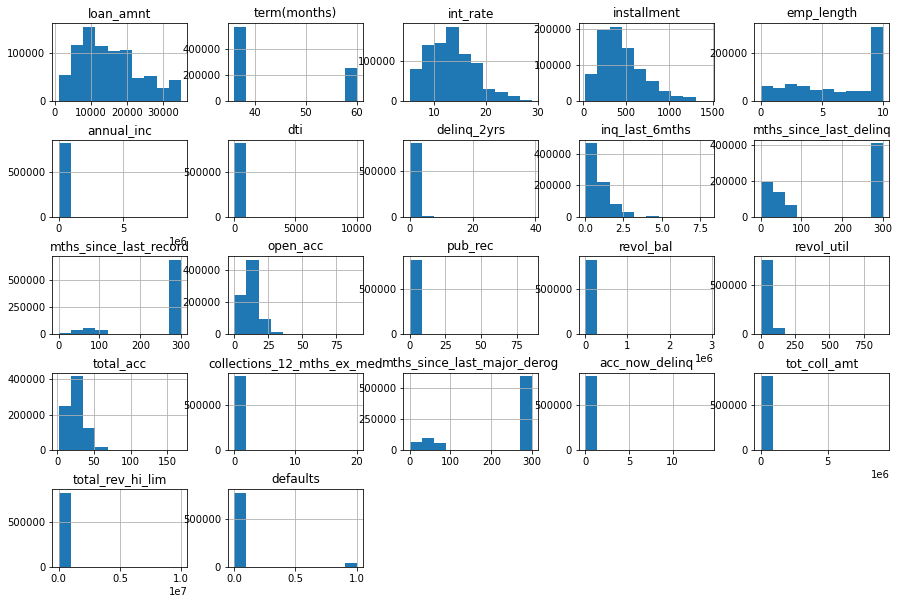

In [85]:
df.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

### Initial Outlier Removal

There appears to be outliers in annual_inc and dti.

In [86]:
df['annual_inc'].max()

9500000.0

Looking at the distributions of many of these columns, there are many columns with a lot of zero values. Also, the max annual income is 9,500,000 which seems to be an outlier(maybe a missing decimal). How many annual income fields do we have that are over 1,000,000?

In [87]:
sum(df['annual_inc']>=1000000)

166

So, there are 166 applicants that are making over 1,000,000 per year. That does not seem right to me. Here I am going to delete the rows reporting income of over $1,000,000.

In [88]:
df = df[df['annual_inc'] < 1000000]
df.shape

(816888, 31)

'dti' - A ratio calculated using the borrower's total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower's self:reported monthly income.

According to this definition, it would make sense to have a maximum value of 100.

In [89]:
df[df['dti']<100]

,loan_amnt,term(months),int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,revol_bal,revol_util,total_acc,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,total_rev_hi_lim,defaults
id,,,,,,,,,,,,,,,,,,,,,
10149342,27050.0,36,10.99,885.46,B,B2,10.0,OWN,55000.0,Verified,...,36638.0,61.2,27.0,Dec-2015,0.0,300.0,0.0,0.0,59900.0,0
10159584,9750.0,36,13.98,333.14,C,C1,1.0,RENT,26000.0,Not Verified,...,7967.0,52.8,28.0,Jan-2016,0.0,300.0,0.0,0.0,15100.0,0
10159498,12000.0,36,6.62,368.45,A,A2,10.0,MORTGAGE,105000.0,Not Verified,...,13168.0,21.6,22.0,Jan-2016,0.0,300.0,0.0,0.0,61100.0,0
10139658,12000.0,36,13.53,407.40,B,B5,10.0,RENT,40000.0,Source Verified,...,5572.0,68.8,32.0,Jan-2016,0.0,53.0,0.0,15386.0,8100.0,0
10159548,15000.0,36,8.90,476.30,A,A5,2.0,MORTGAGE,63000.0,Not Verified,...,11431.0,74.2,29.0,Jan-2016,0.0,34.0,0.0,1514.0,15400.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36371250,10000.0,36,11.99,332.10,B,B5,8.0,RENT,31000.0,Verified,...,14037.0,82.1,15.0,Jan-2016,0.0,300.0,0.0,0.0,17100.0,0
36441262,24000.0,36,11.99,797.03,B,B5,10.0,MORTGAGE,79000.0,Verified,...,8621.0,84.5,23.0,Jan-2016,0.0,29.0,0.0,0.0,10200.0,0
36271333,13000.0,60,15.99,316.07,D,D2,5.0,RENT,35000.0,Verified,...,11031.0,61.3,22.0,Jan-2016,0.0,300.0,0.0,0.0,18000.0,0


In [90]:
# dropping the 31 rows where dti > 100
df = df[df['dti']<100]
df.shape

(816877, 31)

## 2.14 Save the data<a id='2.14_Save_the_data'></a>

In [91]:
# save the data to a new csv file
df.to_csv('../data/LC_cleaned.csv')
df_test.to_csv('../data/LC_2016_2017_cleaned.csv')

## 2.15 Summary<a id='2.15_Summary'></a>
The training and test sets have the same columns and index now.

The columns that I changed in the training set have also been changed in the test set.

I still have not decided how to handle some of the object fields like 'purpose', 'grade', etc. I don't know if these columns can be useful so I've decided to keep them for now. 

I have filled missing values in many of the columns and dropped the remaining rows with missing values. 
